# Edyoucated Data Science Challenge

## The data

In [1]:
import pandas as pd

material = pd.read_csv("material.csv")

material_progress = pd.read_csv("material_progress.csv")

user_skill = pd.read_csv("user_skill.csv")

dfs = [material, material_progress, user_skill]

In [2]:
# After reading the data, have a brief look at each data set

from IPython.display import display, HTML

print ("Dataframe Material:",end='')
display(material.head())

print ("Dataframe Material_Progress:", end='')
display(HTML(material_progress.head().to_html()))

print ("Dataframe User_Skill:")
display(HTML(user_skill.head().to_html()))

Dataframe Material:

,material_id,type,language,duration_minutes
0,DE10273658186102893108,video,en,4
1,DE65100778896973122987,video,en,5
2,DE81811499116100670121,video,en,4
3,DE11810611510611074981,text,en,5
4,DE83768011872511399827,text,de,1


Dataframe Material_Progress:

,user_id,material_id,started_at,finished_at
0,NVtS.3y2cqAPta8vp9mCaAn5NxToIdGRkfNn7xQx,DE98877711174670901191,2016-06-29 16:49:13.759,2016-06-29 16:53:31.886
1,nygas99jztQq9WZnw.6CJcn66D3274iGUz6habfD,DE12131011171121131109,2016-03-17 17:44:49.851,2016-03-17 17:44:51.412
2,9z09kkdnXbwIhNjrCmblpkcq2tMRD6clsOFMAd4j,DE11211470105977410790,2015-10-14 19:57:25.000,2015-10-14 19:57:28.464
3,zxUrSEtSJkcJ4NIXQi1NUMEGT2VeDiGU28APbHyk,DE10578698098111390901,2016-07-05 01:04:46.826,2016-07-05 01:04:48.166
4,WbiAkqGINB.GiElspYTwbIzFzfjI09BZAmhTl8Ff,DE86106683118467121141,2015-09-22 23:37:17.872,2015-09-22 23:53:22.468


Dataframe User_Skill:


,user_id,skill_id,is_mastered
0,9aMTY.HhCbE.KkdjhBwLrYRGMsh7rx3wwlDOFsCK,TRFOqyu.xgwDSQg.0TZGYMGwUSC7EIbzYOqA,False
1,xXtwl2I6mU2BtSu8LkswN6oHtPse60m2cP4xMNXY,9ObapAwuT3A0qeinUTAc8EnScTtfyEB5c6.a,False
2,EpjLTGnmZ1g.Ed45Jbm85M4ZlZj814pIM5JWxAzt,9X7JnvyCgM..Pj.d.CV7bUTZ4FNM3getInnj,False
3,FD.CH9qTlwQOpunsPCi7CsmcGv4.GFFpkUoLWKcP,uMADoKLqo6I8cf.Q.J41Zw0GmDNwIZpZw9iQ,True
4,4KSDKjWfqcgDfRpLH8dBsE8e4oCFQaEKwcqTYpER,4I6eSc7imYY.iZaUKL5.Qwem0J.SY1Ja6uMd,True


The **material table** contains information on *type, language and duration minutes* of learning materials.

The **material_progress table** records all the materials a user has started and the time they finished the respective material (if at all!).

The **user_skill table** records which skills a user has mastered so far.

In [3]:
# print some desriptive statistics
for df in dfs:
    #display(df.info())
    display(df.describe())

,duration_minutes
count,5108.000000
mean,7.047377
std,9.284893
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,240.000000


,user_id,material_id,started_at,finished_at
count,34434,34434,34434,32950
unique,1504,3077,34434,32949
top,hsCIPNkZeP.wQDHuPKXAaMnuQ1nM4Vzaot9l7SjS,DE70725311411075718716,2016-06-29 16:49:13.759,2015-11-05 10:51:26.319
freq,243,127,1,2


,user_id,skill_id,is_mastered
count,19125,19125,19125
unique,1006,2841,2
top,KRCU.FMaTaof0JEjOXVhyE4xxydriyWkA9kBpU1L,Lc7OxS7tU4ASNW23Ve7f9oJzfpcH10IBcKn7,True
freq,92,55,9611


In [4]:
# Check for missing values
print(material.isnull().values.any())
print(material_progress.isnull().values.any())
print(user_skill.isnull().values.any())

False
True
False


The Material_progress table seems to contain missing values.

In [5]:
material_progress.isna().sum()

user_id           0
material_id       0
started_at        0
finished_at    1484
dtype: int64

Missing value in the finished_at column of the material_progress table indicates that the user has not finished the material yet.

## The challenges

### Learning times

1. Perform a short general analysis of the data at hand to gain a general overview (some KPIs or other useful information about the dataset itself). **Done above**
2. Analyze the learning progress of our learners: 
    1. Do actual learning times deviate from our estimated learning times? 
    2. Do the results differ between different types or languages of materials?
    3. Can you detect learners who might be "cheating" with their learning progress (i.e., who probably have not been consuming the learning material) from the data? 
3. What other information can you derive from the data?

#### 2. Analysis of learning progress

array([[<AxesSubplot:title={'center':'duration_minutes'}>]], dtype=object)

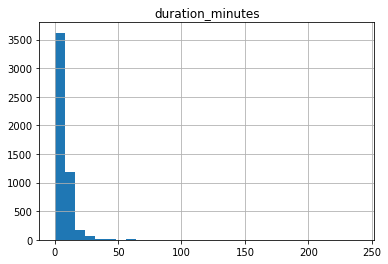

In [6]:
# At first, visualize the material duration_minutes to see if anything stands out

import matplotlib.pyplot as plt
material.hist(column="duration_minutes", bins = 30)

In [7]:
display(material.loc[material["duration_minutes"]>100].sort_values(by="duration_minutes", ascending=False))

,material_id,type,language,duration_minutes
1148,DE97580466559010090837,video,en,240
1467,DE77118113115978898261,video,en,180
1512,DE91076583821154864672,video,en,180
2607,DE85105871114871101009,video,en,180
2729,DE11511139781001088611,interactive,en,180
3168,DE67802868166821149776,text,de,150
156,DE12212211211386751039,interactive,en,120
3846,DE69010569871037511880,video,en,103


There seem to be only few materials with an estimated duration of >100 minutes

From the analysis at the beginning we know, that the *average duration_minutes is 7.047377*

In [8]:
# Add a column to the material_progress dataframe that indicates the material completion duration

# Thanks to stackoverflow
from datetime import datetime

def calc_dur(tstamp1, tstamp2):
    fmt = '%Y-%m-%d %H:%M:%S.%f'
    tstamp1 = datetime.strptime(tstamp1, fmt)
    tstamp2 = datetime.strptime(tstamp2, fmt)

    if tstamp1 > tstamp2:
        td = tstamp1 - tstamp2
    else:
        td = tstamp2 - tstamp1
    
    #print(int(round(td.total_seconds()/60)))
    
    #return time difference in minutes, neglect seconds for now
    return int(round(td.total_seconds()/60))

In [9]:
# We can only calculate that duration for completed materials.
# Hence, drop rows with materials that users have not finished yet

material_progress_2 = material_progress[material_progress["finished_at"].notna()]

print(material_progress.shape)
print(material_progress_2.shape)
print("Dropped ", material_progress.shape[0]-material_progress_2.shape[0], "columns.")

(34434, 4)
(32950, 4)
Dropped  1484 columns.


In [10]:
# Check how the new column will look like
material_progress_2.apply (lambda row: calc_dur(row.started_at, row.finished_at), axis=1)

0         4
1         0
2         0
3         0
4        16
         ..
34429    16
34430     2
34431     5
34432     5
34433     0
Length: 32950, dtype: int64

In [65]:
pd.options.mode.chained_assignment = None # Following assignment triggers a (false positive) warning
material_progress_2["completion_duration"] = material_progress_2.apply (lambda row: calc_dur(row.started_at, row.finished_at), axis=1)

In [12]:
material_progress_2.head()

,user_id,material_id,started_at,finished_at,completion_duration
0,NVtS.3y2cqAPta8vp9mCaAn5NxToIdGRkfNn7xQx,DE98877711174670901191,2016-06-29 16:49:13.759,2016-06-29 16:53:31.886,4
1,nygas99jztQq9WZnw.6CJcn66D3274iGUz6habfD,DE12131011171121131109,2016-03-17 17:44:49.851,2016-03-17 17:44:51.412,0
2,9z09kkdnXbwIhNjrCmblpkcq2tMRD6clsOFMAd4j,DE11211470105977410790,2015-10-14 19:57:25.000,2015-10-14 19:57:28.464,0
3,zxUrSEtSJkcJ4NIXQi1NUMEGT2VeDiGU28APbHyk,DE10578698098111390901,2016-07-05 01:04:46.826,2016-07-05 01:04:48.166,0
4,WbiAkqGINB.GiElspYTwbIzFzfjI09BZAmhTl8Ff,DE86106683118467121141,2015-09-22 23:37:17.872,2015-09-22 23:53:22.468,16


array([[<AxesSubplot:title={'center':'completion_duration'}>]],
      dtype=object)

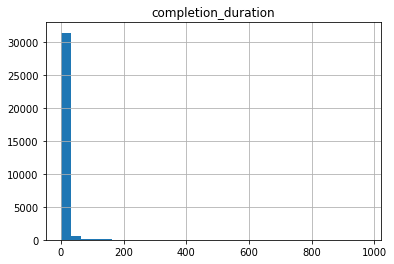

In [13]:
material_progress_2.loc[material_progress_2["completion_duration"]<1000].hist(column="completion_duration", bins = 30)

array([[<AxesSubplot:title={'center':'completion_duration'}>]],
      dtype=object)

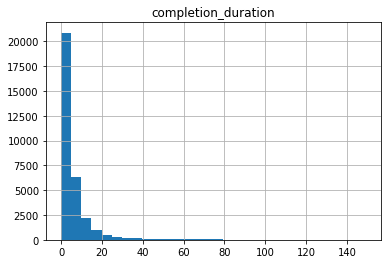

In [14]:
# It appears we have some strong outliers in the data.
# I'd recommend analyzing these outliers and deciding on a strategy to deal with them.

# In this challenge I will just omit completion durations above 150 minutes to not let the outliers influence the
# mean completion duration too much.

material_progress_2.loc[material_progress_2["completion_duration"]<150].hist(column="completion_duration", bins = 30)

In [15]:
# Actually filter the dataframe
df = material_progress_2.loc[material_progress_2["completion_duration"]<150]

In [16]:
# Next up: Calculate the deviation of estimated learning time from the actual completion duration
df_completion = df.groupby(['material_id']).mean("completion_duration")

In [17]:
result = pd.merge(df_completion, material, how ="left", on="material_id")
result

,material_id,completion_duration,type,language,duration_minutes
0,DE10010111280784688110,2.920000,video,de,6
1,DE10010246117994100398,12.750000,video,en,15
2,DE10010372115610210884,2.666667,text,en,2
3,DE10010410382460105821,1.261905,video,de,1
4,DE10010411010110382880,9.125000,video,de,9
...,...,...,...,...,...
2951,DE99983847484731071197,2.800000,video,en,1
2952,DE99986665117974679811,5.230769,video,en,4
2953,DE99987103858498764690,10.600000,video,en,6
2954,DE99988789117119122111,0.900000,video,de,1


**A: Do actual learning times deviate from our estimated learning times?**

In [18]:
print("Answer to A")
print()
print("The average deviation (in minutes) between the estimated material completion duration and \n",
      "actual material completion duration is: ", 
    abs(result["completion_duration"].mean() - result["duration_minutes"].mean()))

Answer to A

The average deviation (in minutes) between the estimated material completion duration and 
 actual material completion duration is:  0.26897027889498926


**B: Do the results differ between different types or languages of materials?**

In [19]:
result_1 = result.groupby(by="type").agg('mean')
result_1

,completion_duration,duration_minutes
type,,
interactive,8.522360,13.691358
text,5.472149,6.845855
video,6.909707,6.584403


In [20]:
result_1["deviation"] = abs(result.groupby(by="type").agg('mean').iloc[:,0] - result.groupby(by="type").agg('mean').iloc[:,1])
result_1

,completion_duration,duration_minutes,deviation
type,,,
interactive,8.522360,13.691358,5.168998
text,5.472149,6.845855,1.373706
video,6.909707,6.584403,0.325304


The deviations vary strongly between different types of materials.

i.e. the deviation between estimated and average learning times is 3.76 times stronger for interactive content than text content.

In [21]:
result_2 = result.groupby(by="language").agg('mean')
result_2["deviation"] = abs(result.groupby(by="language").agg('mean').iloc[:,0] - result.groupby(by="language").agg('mean').iloc[:,1])
result_2

,completion_duration,duration_minutes,deviation
language,,,
de,4.265359,5.421937,1.156577
en,7.782603,7.589506,0.193097


Furthermore, the estimated duration time for englisch materials seems to fit the actual completion duration better than german materials.

In [33]:
result.groupby(["language", "type"]).size().reset_index(name='counts')

,language,type,counts
0,de,interactive,21
1,de,text,307
2,de,video,684
3,en,interactive,60
4,en,text,465
5,en,video,1419


In [34]:
print("The german video to overall content ratio is ",684/(21+307+684))
print()
print("The english video to overall content ratio is ",1419/(60+465+1419))

The german video to overall content ratio is  0.6758893280632411

The english video to overall content ratio is  0.7299382716049383


*My hypothesis: The more accurate learning time estimates for english content can be (at least partially) explained
by the higher video to content ratio (as seen above, estimated completion times for video content are most accurate) and overall more data*

**C: Can you detect learners who might be "cheating" with their learning progress (i.e., who probably have not been consuming the learning material) from the data?**

For this task we need to define what cheating means in terms of material completion time:

**Let's say someone is cheating on a material when he or she finishes the given material in below half of the estimated duration.**

Notice!
(This isn't optimal, as the learner might already know the material and skips it as a consequence. This should be allowed for some materials curated in a learning path or skill and isn't neccessarily cheating. However, we don't know which material_ids belong to which learning path and therefore can't check the percentage of materials in a given learning path a learner might've cheated on.)

In [23]:
# Merge our previous dataframe with user completion duration and the material dataframe
user_mat_df = pd.merge(df, material, how ="left", on="material_id")
user_mat_df

,user_id,material_id,started_at,finished_at,completion_duration,type,language,duration_minutes
0,NVtS.3y2cqAPta8vp9mCaAn5NxToIdGRkfNn7xQx,DE98877711174670901191,2016-06-29 16:49:13.759,2016-06-29 16:53:31.886,4,video,de,4
1,nygas99jztQq9WZnw.6CJcn66D3274iGUz6habfD,DE12131011171121131109,2016-03-17 17:44:49.851,2016-03-17 17:44:51.412,0,text,de,10
2,9z09kkdnXbwIhNjrCmblpkcq2tMRD6clsOFMAd4j,DE11211470105977410790,2015-10-14 19:57:25.000,2015-10-14 19:57:28.464,0,video,de,3
3,zxUrSEtSJkcJ4NIXQi1NUMEGT2VeDiGU28APbHyk,DE10578698098111390901,2016-07-05 01:04:46.826,2016-07-05 01:04:48.166,0,text,en,5
4,WbiAkqGINB.GiElspYTwbIzFzfjI09BZAmhTl8Ff,DE86106683118467121141,2015-09-22 23:37:17.872,2015-09-22 23:53:22.468,16,video,en,9
...,...,...,...,...,...,...,...,...
32300,jJzReYmETY2QsJwrK2IfogHRT.BsS2ep6mYPbsx3,DE85896610092102111190,2016-02-01 12:55:49.407,2016-02-01 13:11:43.743,16,video,en,9
32301,JKPXrOAoD3MTLPSKCXwpboEuIk6lLUo0QfOqcVKT,DE11410165104119910883,2015-03-01 09:29:42.916,2015-03-01 09:32:08.007,2,video,de,2
32302,aWxqWegyYCk0j1FRv4XgWQuQfSo0lHyRIqlvILgN,DE11190737899794611770,2016-02-17 15:05:45.786,2016-02-17 15:10:55.866,5,video,en,5
32303,33OhcAGnEeUAZL5gnVJshIt6Z9eot5FK6OfmjoJw,DE75112807286739821091,2016-02-13 10:14:09.115,2016-02-13 10:19:10.426,5,video,de,5


In [36]:
import numpy as np

# Create an additional column that indicates whether a learner 'cheated' on a material or not
# We define cheating as completing a resource in under half of the estimated completion time.
user_mat_df["Cheated"] = np.where(user_mat_df.completion_duration < user_mat_df.duration_minutes/2, True, False)

In [40]:
# check the resulting dataframe
user_mat_df.head()

,user_id,material_id,started_at,finished_at,completion_duration,type,language,duration_minutes,Cheated
0,NVtS.3y2cqAPta8vp9mCaAn5NxToIdGRkfNn7xQx,DE98877711174670901191,2016-06-29 16:49:13.759,2016-06-29 16:53:31.886,4,video,de,4,False
1,nygas99jztQq9WZnw.6CJcn66D3274iGUz6habfD,DE12131011171121131109,2016-03-17 17:44:49.851,2016-03-17 17:44:51.412,0,text,de,10,True
2,9z09kkdnXbwIhNjrCmblpkcq2tMRD6clsOFMAd4j,DE11211470105977410790,2015-10-14 19:57:25.000,2015-10-14 19:57:28.464,0,video,de,3,True
3,zxUrSEtSJkcJ4NIXQi1NUMEGT2VeDiGU28APbHyk,DE10578698098111390901,2016-07-05 01:04:46.826,2016-07-05 01:04:48.166,0,text,en,5,True
4,WbiAkqGINB.GiElspYTwbIzFzfjI09BZAmhTl8Ff,DE86106683118467121141,2015-09-22 23:37:17.872,2015-09-22 23:53:22.468,16,video,en,9,False


In [37]:
# Column 'Cheated' accounts for the amount of materials a user might've cheated on
cheated_df = user_mat_df.groupby(by="user_id").sum("Cheated").sort_values(by="Cheated",ascending=False)
cheated_df

,completion_duration,duration_minutes,Cheated
user_id,,,
KRCU.FMaTaof0JEjOXVhyE4xxydriyWkA9kBpU1L,19,1601,231
vVB3LEm99NoaNegAaXf8Hcfs1C0K77uY6hm.BneP,100,1617,215
ZfhRRI8gCEwUghEBvW30fInyMzG7nOeyAzq8FDXL,4,1240,196
AvYb9Drr7DAbTvR6.twAqsne8APF4FcCQ732MLHG,51,1591,192
.99Rok5rK8k5TRx45QX.mUNkI3.ndzSd2q1f5jDv,10,990,184
...,...,...,...
T9gqYkyF3BoOyksZcoDg.IMzKPuzZbm9wN7kVJ8j,5,5,0
Smj3Hp.6qJ6r3roOmDG5CgsIhbAUrFQQ2MVmMfWL,31,30,0
SjPq3cH.S7.c2nC80X4KbAq.oKyUuCkWoagmYj2j,90,25,0


Let's see whether we can see a relationship between a user's number of completed materials and the detected number of cheating attempts

<AxesSubplot:xlabel='counts', ylabel='Cheated'>

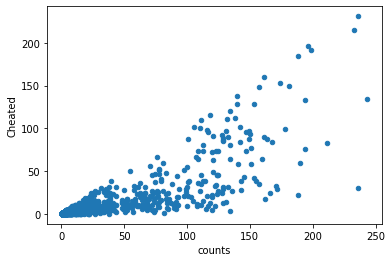

In [38]:
pd.merge((user_mat_df.groupby(by="user_id").size().reset_index(name='counts')), cheated_df, how ="left", on="user_id").plot.scatter(x="counts", y="Cheated")

In [43]:
user_cheats = pd.merge((user_mat_df.groupby(by="user_id").size().reset_index(name='counts')), cheated_df, how ="left", on="user_id")

In [45]:
user_cheats["cheated_ratio"] = user_cheats.Cheated / user_cheats.counts 

array([[<AxesSubplot:title={'center':'cheated_ratio'}>]], dtype=object)

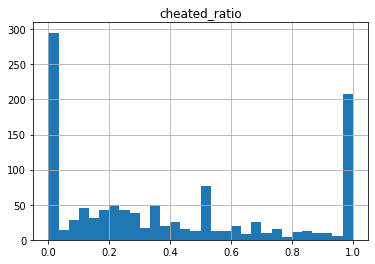

In [48]:
user_cheats.hist("cheated_ratio", bins = 30)

The histogram indicates that we have a high number of learners with a high cheating ratio.

Next up one could try to analyze what this high number of potential cheaters consists of. 

For example, a high cheated_ratio for a user could come from a user that only looked at very few materials overall and briefly skipped through them to check out the edyoucated platform workflow.

#### 3. What other information can you derive from the data?

An exciting question that I'd love to answer when working with the Data Science team at edyoucated :)

### User classes

In the provided data you find information about some of our users and their skills. The goal of this challenge is to create a useful `User` **class in Python** (all the details are up to you). A user object should have (you can add more information if useful)

1. An identifier so that we can distinguish different users from each other uniquely,
2. Their skills (you can find them in the data), together with their "mastery" status, 
3. A `describe()` method which gives a summary of all relevant information about the user. 

Once your `User` class is finished, create a list of all the users and their respective skills from the provided dataset.

In [62]:
class User:
    
    # I assume that the users to import already are equipped with a unique id.
    # Otherwise I'd probably create a dictionary for users as class variable, so that
    # all instances can keep track of the current users and prevent duplicate userIds
    # when creating a new user
    
    def __init__(self, user_id):
        self.user_id = user_id
        
        # A list for a users skills. Skills appended as dictionaries.
        self.skills = []
        
    def add_skill(self, skill_id, mastery_status): 
        self.skills.append({"skill_id":skill_id, "mastery_status":mastery_status})
    
    # set mastery status of a given skill to true
    def mastery_status_true(self, skill_id):
        for skill in self.skills:
            if skill["skill_id"] == skill_id: skill["mastery_status"]= True
                
    # set mastery status of a given skill to false
    def mastery_status_false(self, skill_id):
        for skill in self.skills:
            if skill["skill_id"] == skill_id: skill["mastery_status"]= False
            
    # print neat summary of the user
    def describe(self):
        
        # Number of skills
        skills_number = len(self.skills)
        
        # Percentage of mastered skills out of total skills
        skills_mastered_perc = round(len([i for i in self.skills if i['mastery_status'] == True]) / len(self.skills), 2)
        
        print(f"Summary stats for user with ID: {self.user_id} \n \n")
        
        print(f"The user has started {skills_number} skills so far. Great! Keep going! \n")
        
        print(f"The user has mastered {skills_mastered_perc}% of their started skills.")
        
    # We could also add all kinds of metrics like
    # Number of materials started
    # Number of materials completed
    # Different summary metrics like sum, min, max completion duration
    # Learning time over the past week, months, year etc.
    # Number of completed materials or skills over the past week, months, year etc.


In [63]:
# create a list of all the users and their respective skills from the provided dataset

def create_users(df):
    users = []
    count = 0
    for id in user_skill["user_id"].unique():
        count += 1
        user = User(id)

        for index, row in df.loc[df["user_id"]==id].iterrows():
            user.add_skill(row['skill_id'], row['is_mastered'])

            
        users.append(user)
    
    return users
    
users = create_users(user_skill)

In [64]:
users[0].describe()

Summary stats for user with ID: 9aMTY.HhCbE.KkdjhBwLrYRGMsh7rx3wwlDOFsCK 
 

The user has started 35 skills so far. Great! Keep going! 

The user has mastered 0.46% of their started skills.
